In [1]:
import importlib

from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]

%matplotlib inline
import tensorflow as tf

from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3, ForcedDiversityBootstrapThroughTime

# Linear

In [2]:
num_meta_epochs = 3#100#10
num_epochs = 10#50#15#50
seed = 4200
num_samples = 150

model_params = {'num_epochs':num_epochs,'seed':seed,'initialisation_scheme':tf.keras.initializers.he_normal}

dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10, 10,10]
num_neurons_nonlinear = [10,10,10,10,5]

activations = [tf.nn.tanh]*len(num_neurons)
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'activations':activations,'num_neurons':num_neurons,
                'num_epochs':num_epochs,'seed':seed}

experiment started at 2018-08-15 14:13:13.057055
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 11.271153926849365 seconds. That means the whole run will probably take 33.813461780548096 more seconds and 0.5635576963424682 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.Ensembl

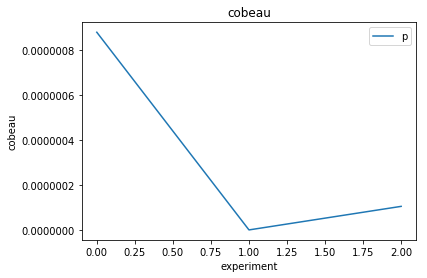

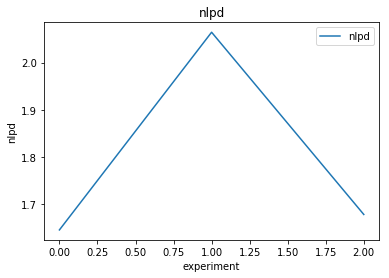

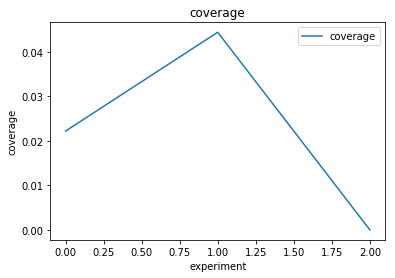

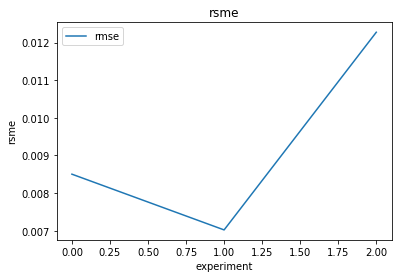

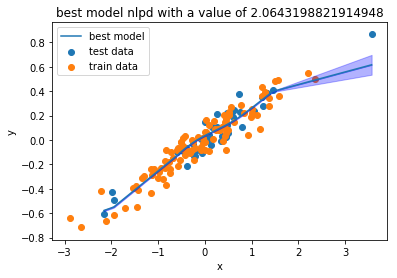

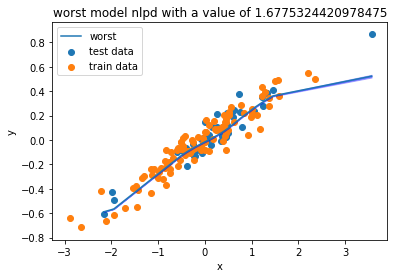

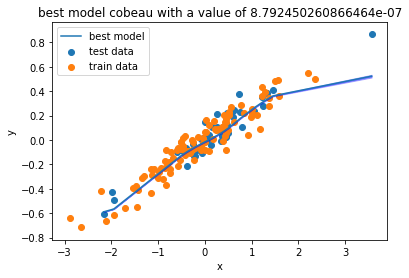

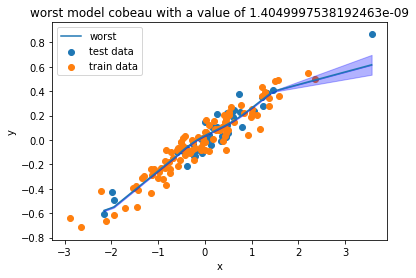

In [3]:
pd = repeat_experiment(BootstrapEnsemble, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 14:13:51.710971
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 56.5344512462616 seconds. That means the whole run will probably take 169.6033537387848 more seconds and 2.82672256231308 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 151.40559101104736 seconds with 3 experiments
             cobeau  coverage       nlpd      rsme
count  3.000000e+00       3.0   3.000000  3.000000
mean   1.856845e-01       0.0  -8.502040  0.008108
std    2.623521e-01       0.0   1.709600  0.001710
min    1.1

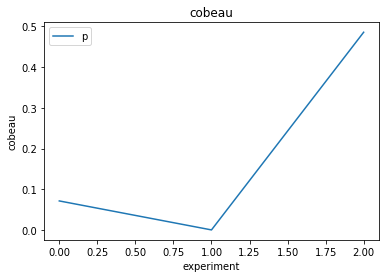

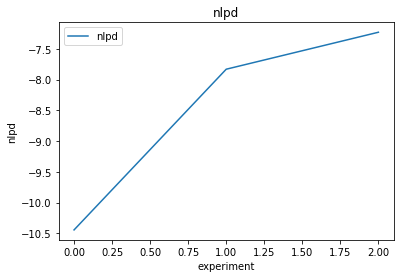

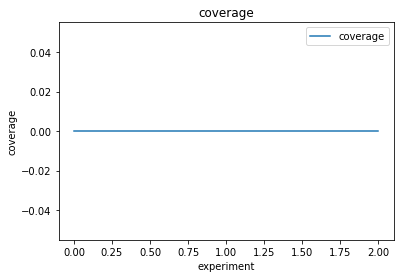

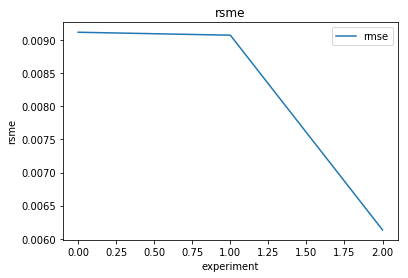

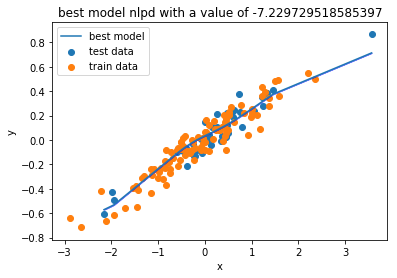

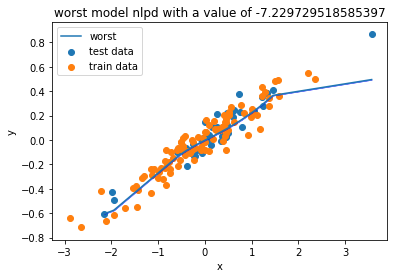

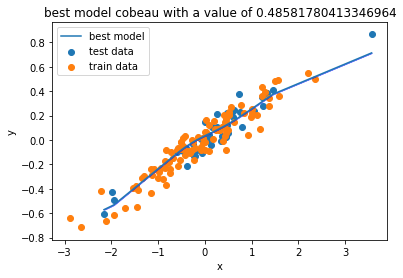

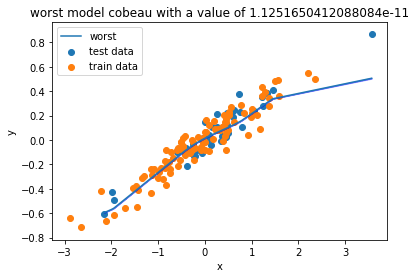

In [4]:
pd1 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 14:16:29.844798
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
experiment number 1 took 47.97470307350159 seconds. That means the whole run will probably take 143.92410922050476 more seconds and 2.398735153675079 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
overall, it took 156.76644110679626 seconds with 3 experiments
         cobeau  coverage       nlpd      rsme
count  3.000000  3.000000   3.000000  3.000000
mean   0.220706  0.007407 -11.482046  0.007875
std    0.305819  0.012830   6.356352  0.001751
min    0.002528  0.0

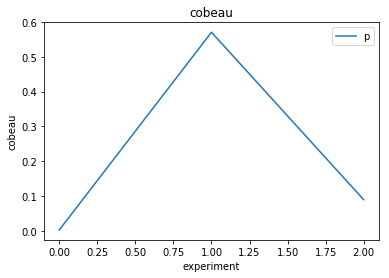

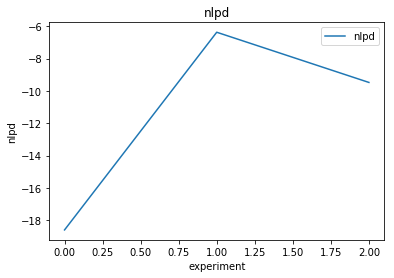

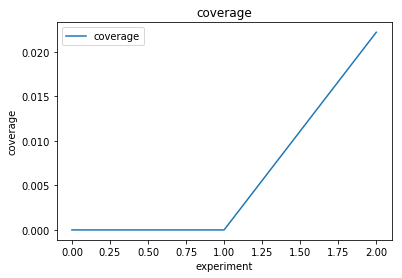

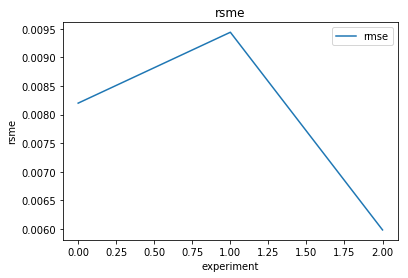

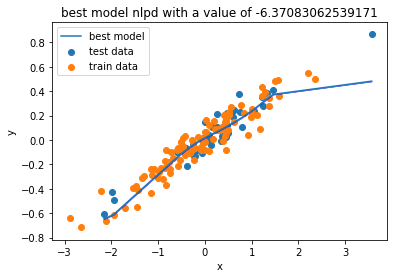

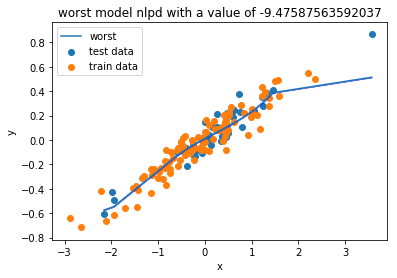

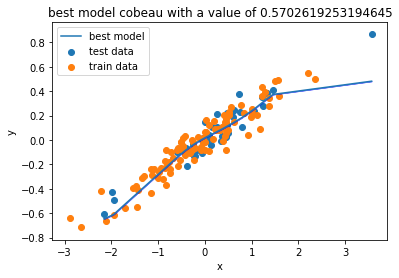

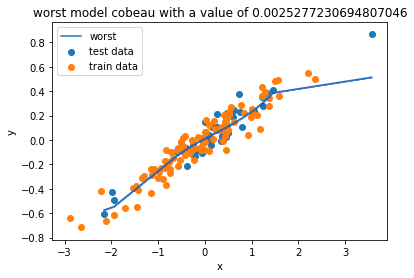

In [5]:
pd2 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [6]:
#num_meta_epochs = 3#10
#num_epochs = 5#50
seed = 42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':num_neurons_nonlinear}

dataset_params = {'num_samples':num_samples,'seed':seed}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-15 14:19:10.921342
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 27.07101011276245 seconds. That means the whole run will probably take 81.21303033828735 more seconds and 1.3535505056381225 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleN

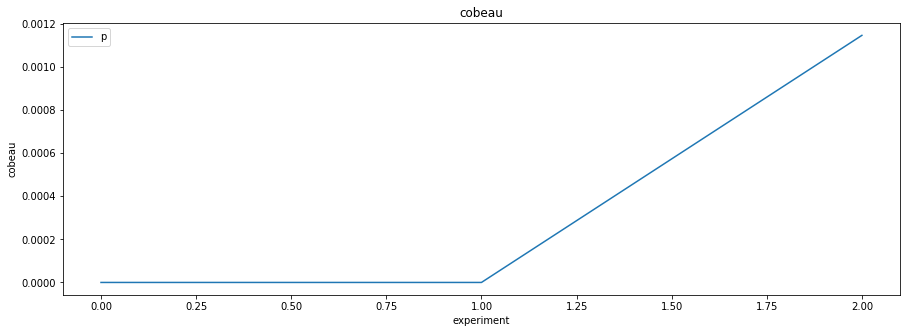

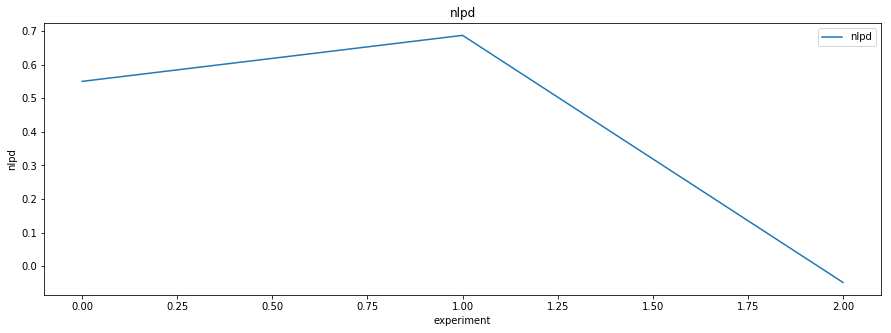

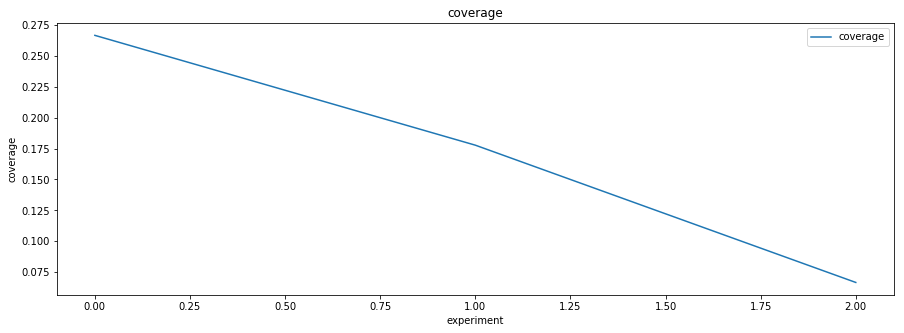

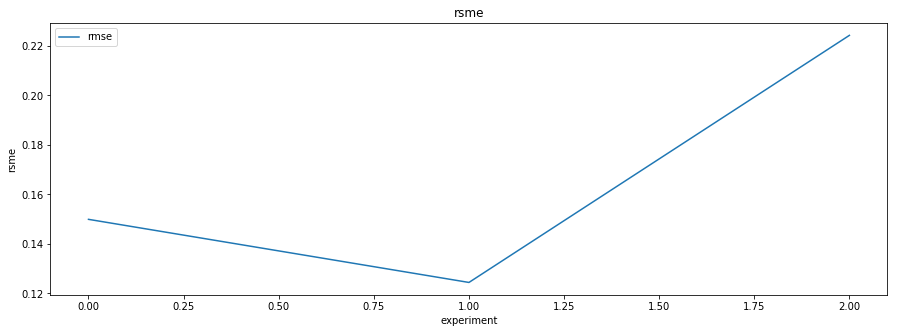

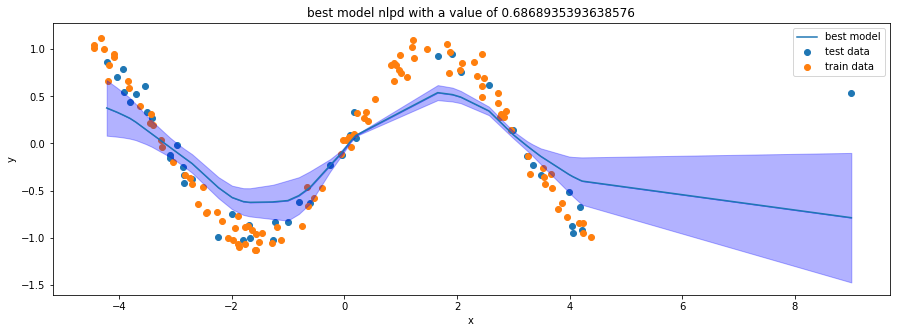

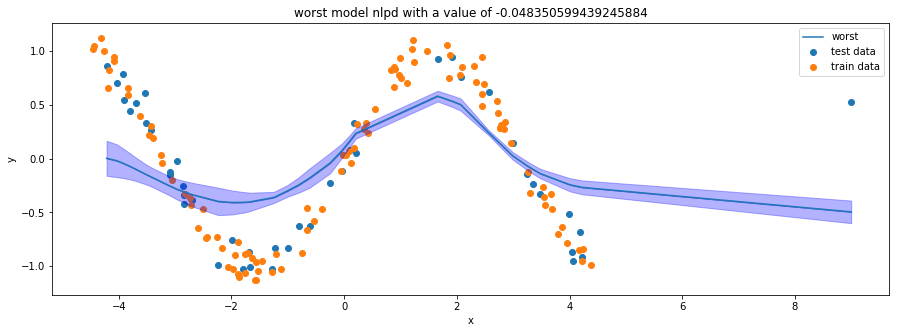

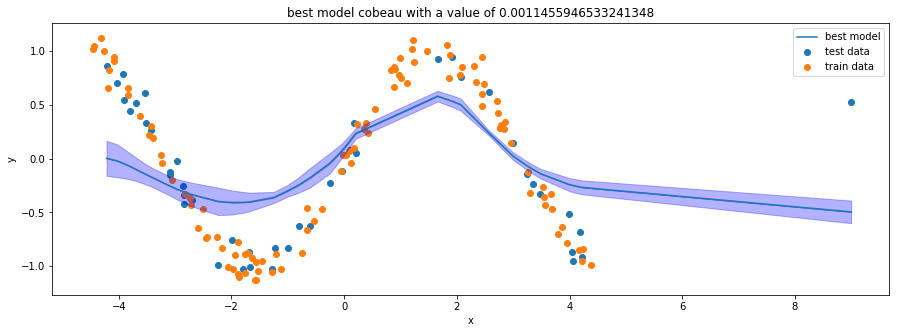

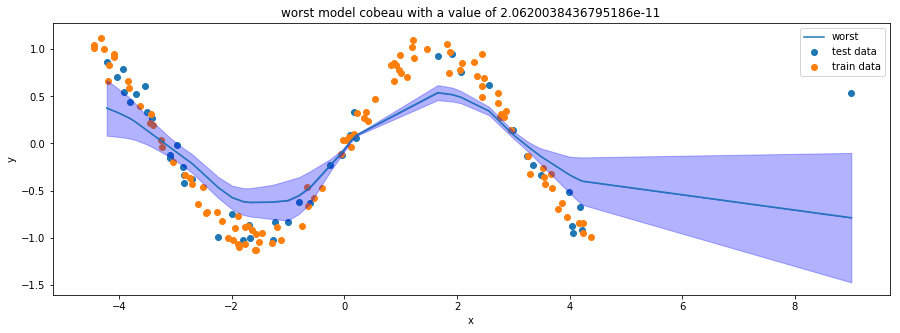

In [7]:
pd11 = repeat_experiment(BootstrapEnsemble, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 14:20:35.641886
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 95.7232449054718 seconds. That means the whole run will probably take 287.1697347164154 more seconds and 4.78616224527359 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 285.0167701244354 seconds with 3 experiments
             cobeau  coverage       nlpd      rsme
count  3.000000e+00  3.000000   3.000000  3.000000
mean   4.681825e-01  0.022222 -18.722542  0.145651
std    4.130838e-01  0.038490  22.555367  0.061381
min    5.86

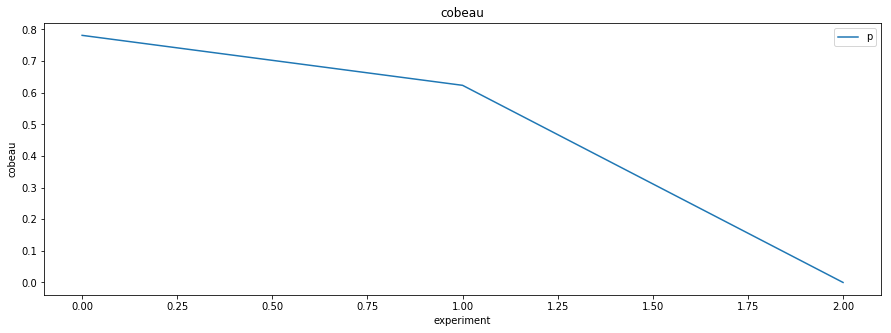

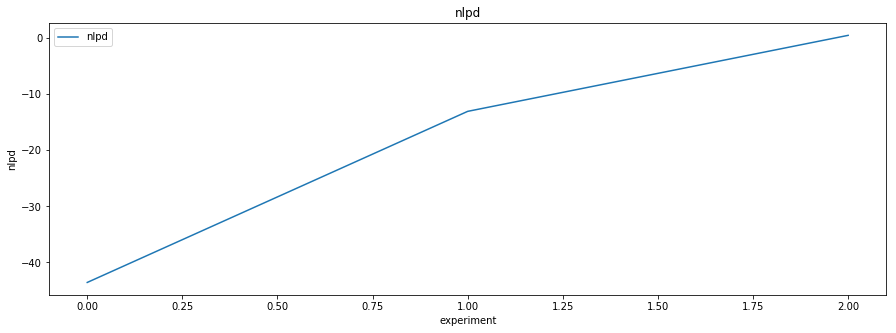

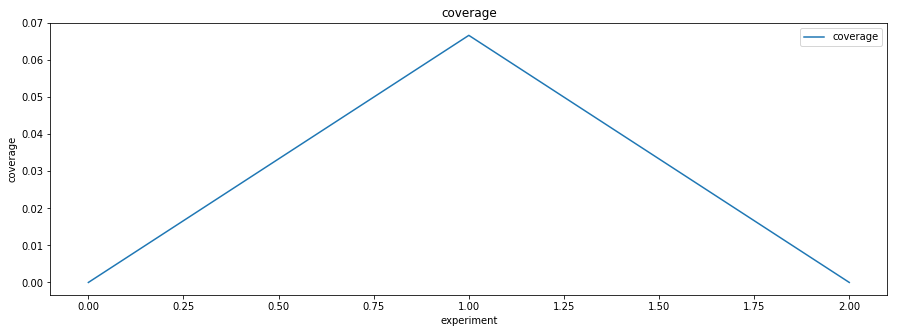

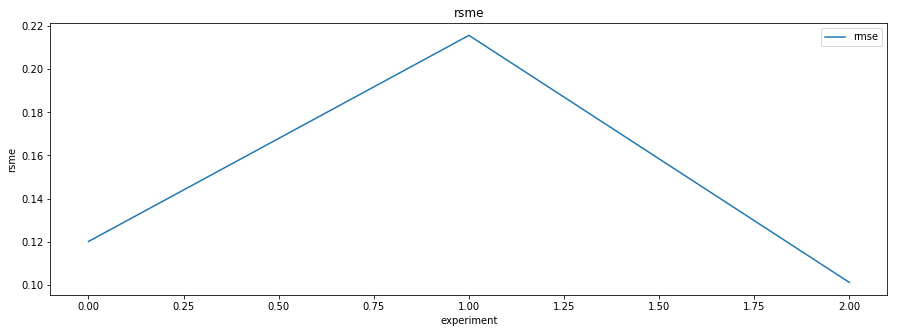

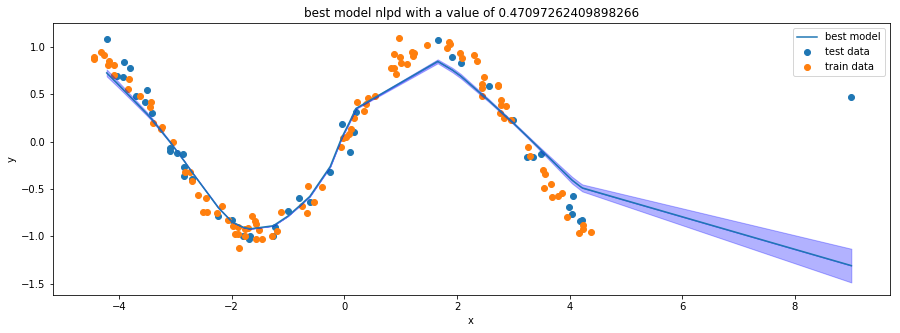

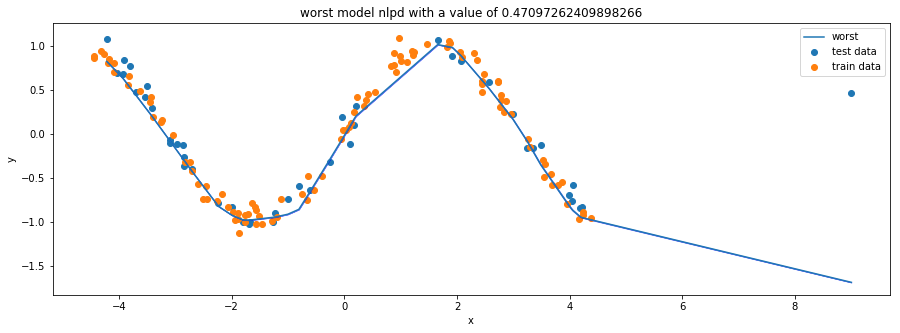

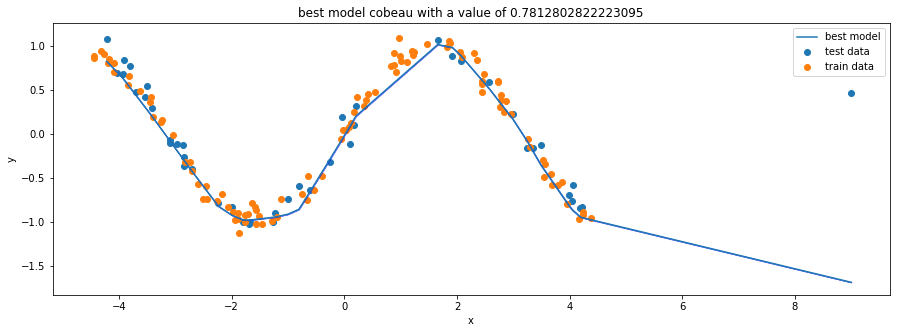

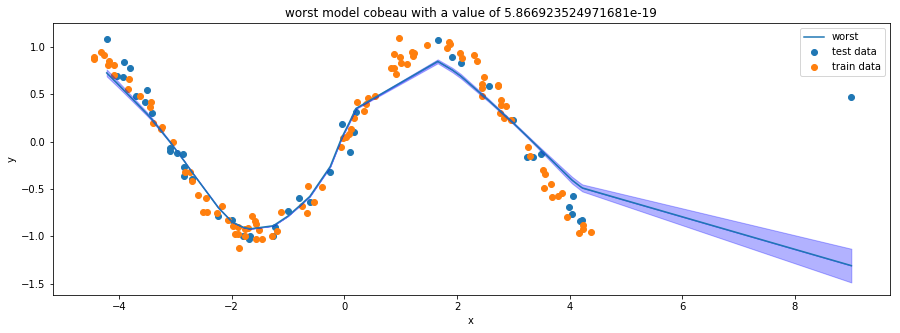

In [8]:
pd22 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 14:25:25.809167
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
experiment number 1 took 100.81823897361755 seconds. That means the whole run will probably take 302.45471692085266 more seconds and 5.040911948680877 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
overall, it took 298.8499610424042 seconds with 3 experiments
         cobeau  coverage       nlpd      rsme
count  3.000000  3.000000   3.000000  3.000000
mean   0.284000  0.037037  -4.379609  0.113827
std    0.487372  0.012830   7.178786  0.034569
min    0.000010  0.0

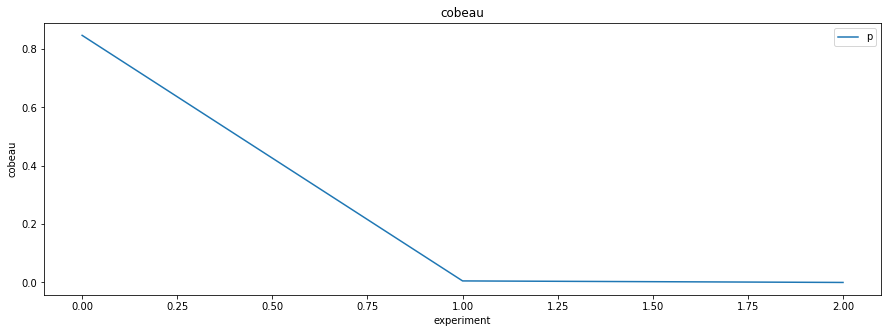

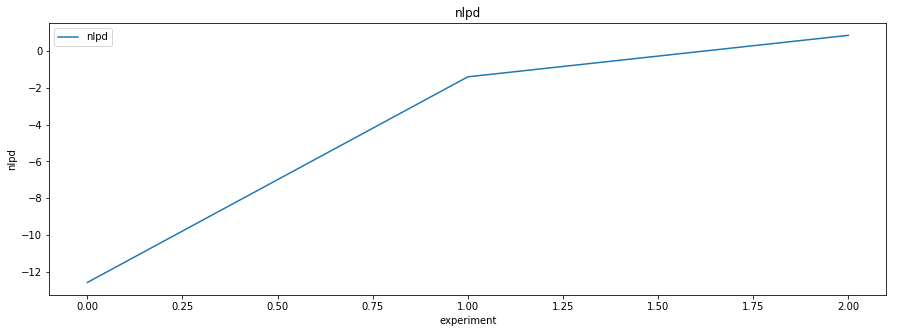

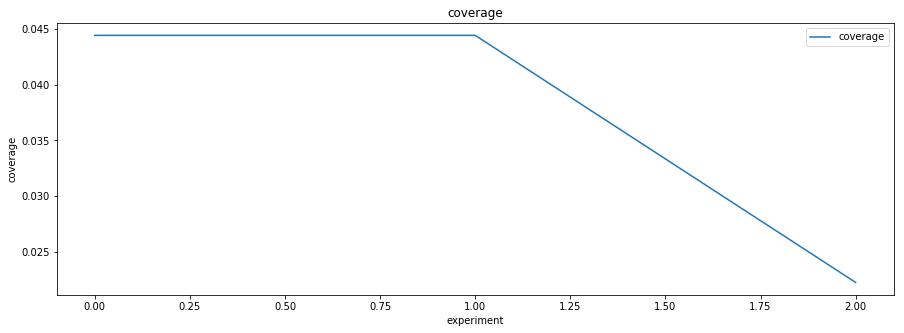

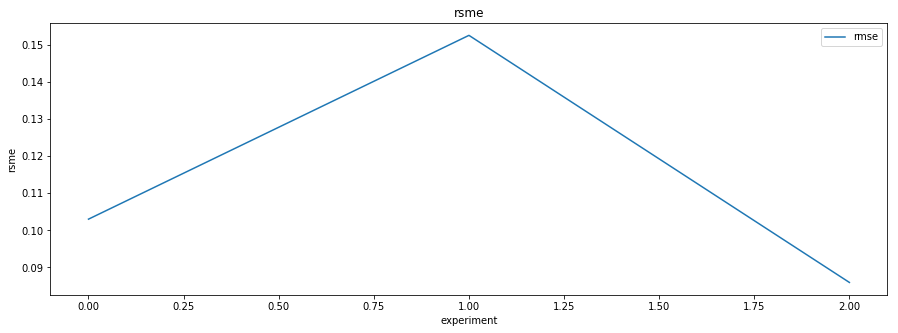

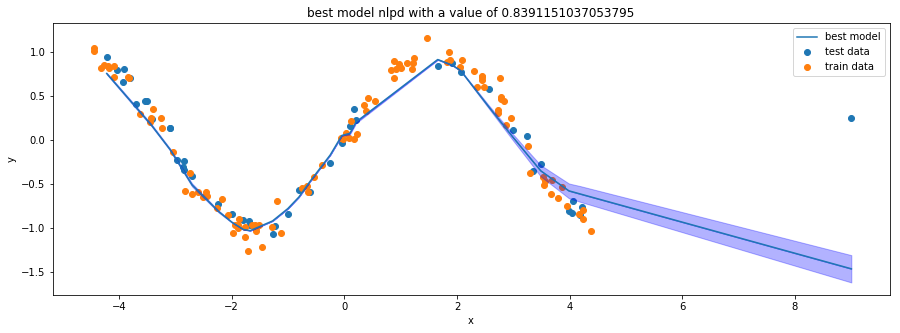

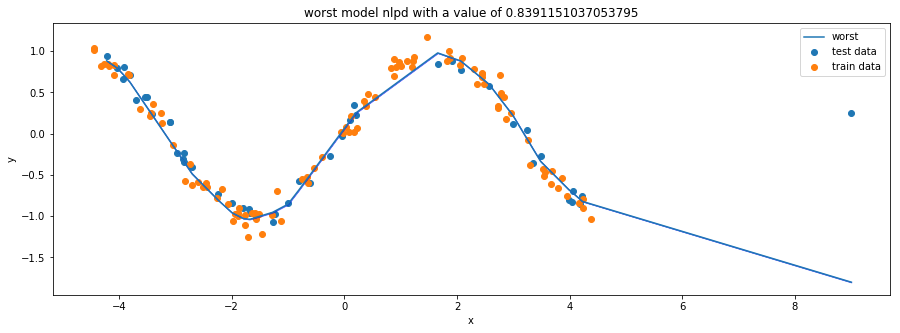

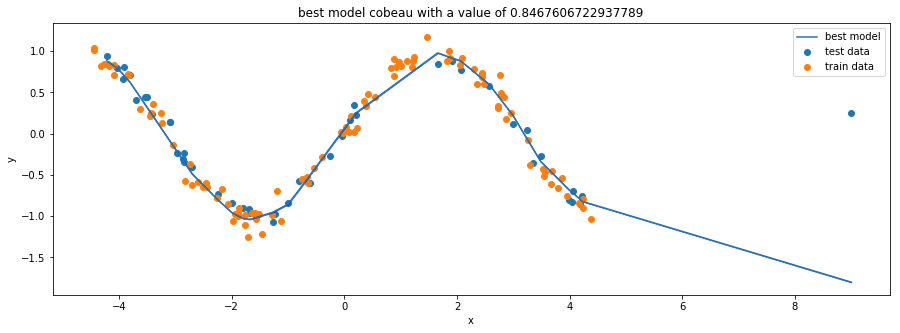

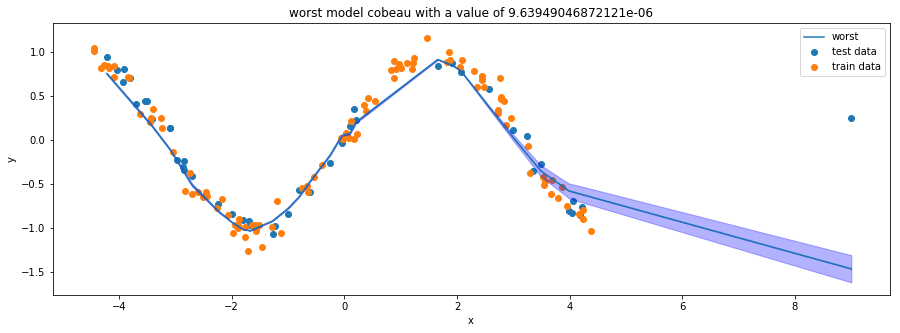

In [9]:
pd33 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 14:30:30.661131
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
experiment number 1 took 98.53955674171448 seconds. That means the whole run will probably take 295.61867022514343 more seconds and 4.926977837085724 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
overall, it took 263.1971278190613 seconds with 3 experiments
             cobeau  coverage        nlpd      rsme
count  3.000000e+00       3.0    3.000000  3.000000
mean   3.335469e-01       0.0 -150.663922  0.200035
std    5.307255e-01       0.0  183.525338  0.055854
min    1.605255e-49      

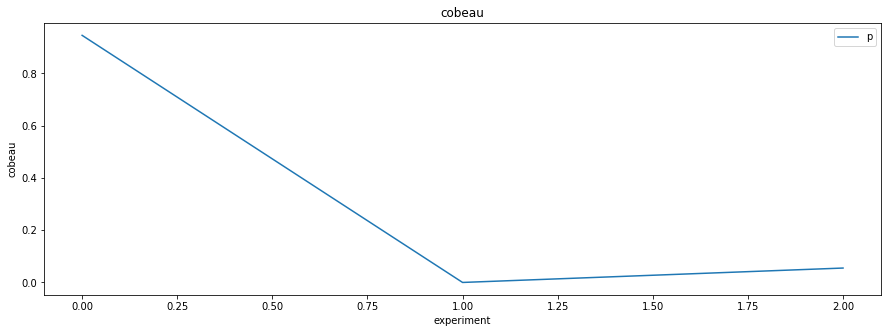

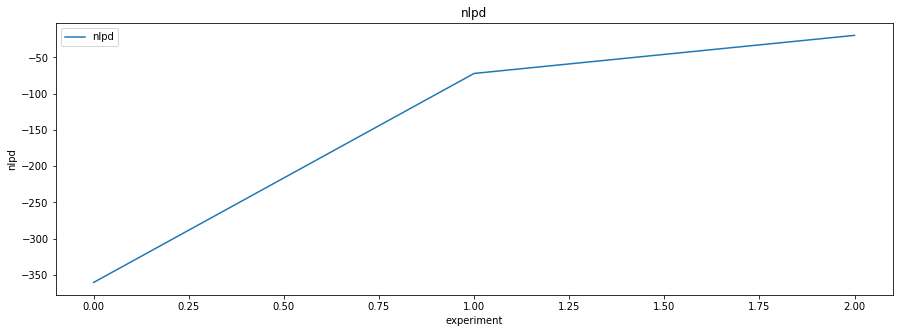

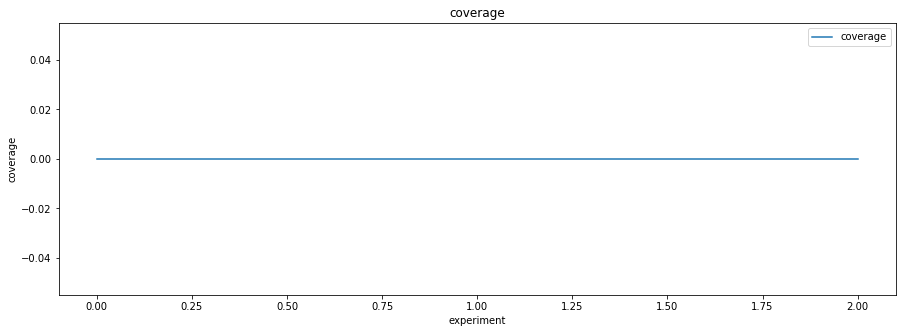

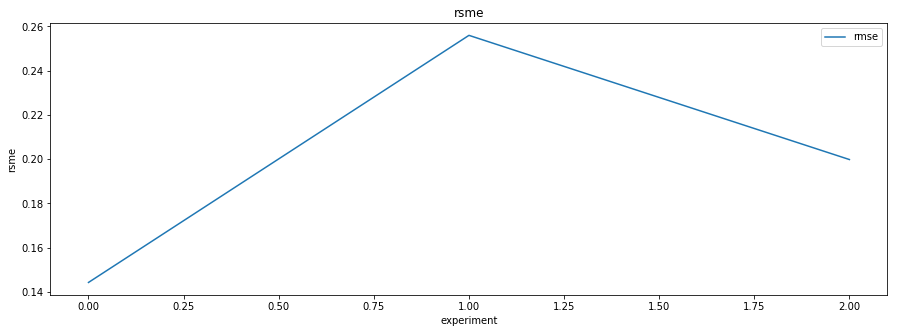

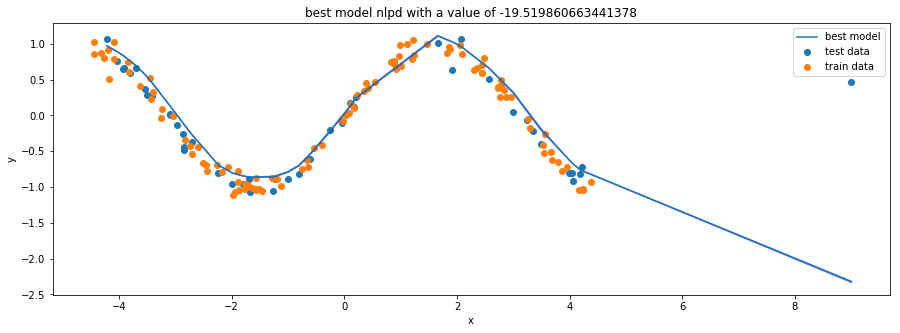

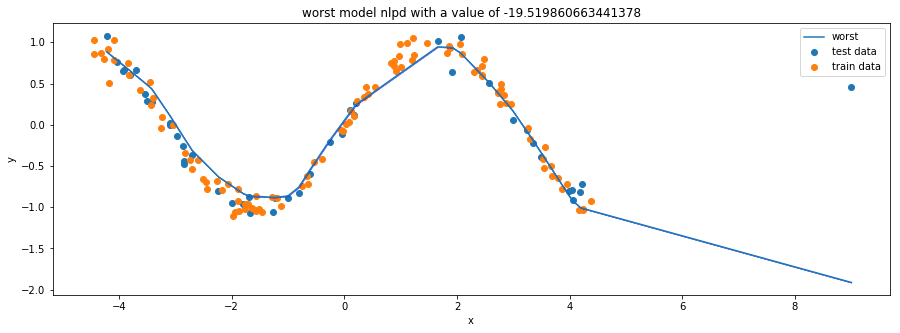

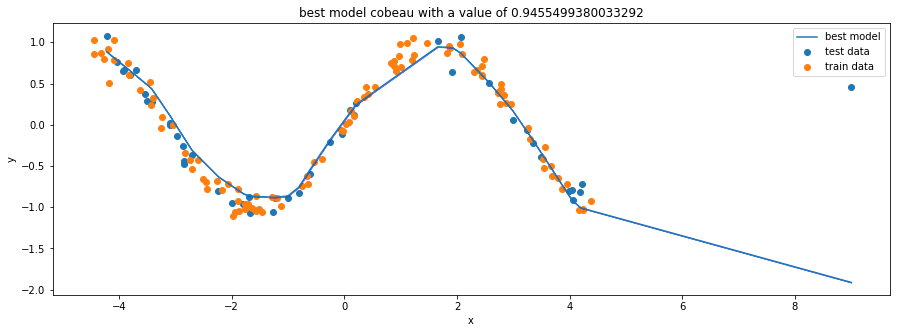

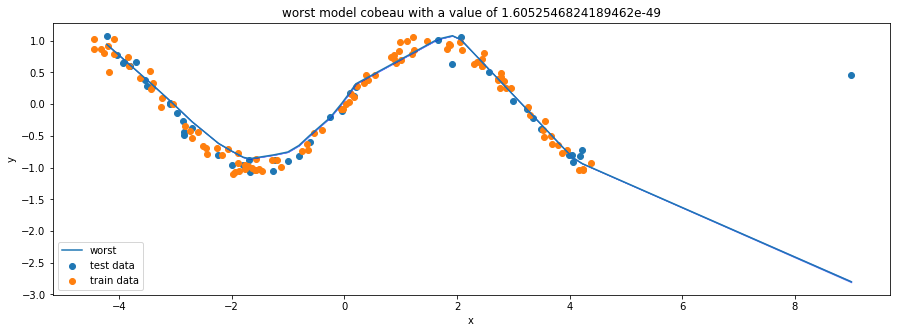

In [10]:
pd44 = repeat_experiment(BootstrapThroughTimeBobStrap, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

# X3

In [11]:
dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-15 14:34:58.189130
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 19.62417197227478 seconds. That means the whole run will probably take 58.87251591682434 more seconds and 0.981208598613739 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNe

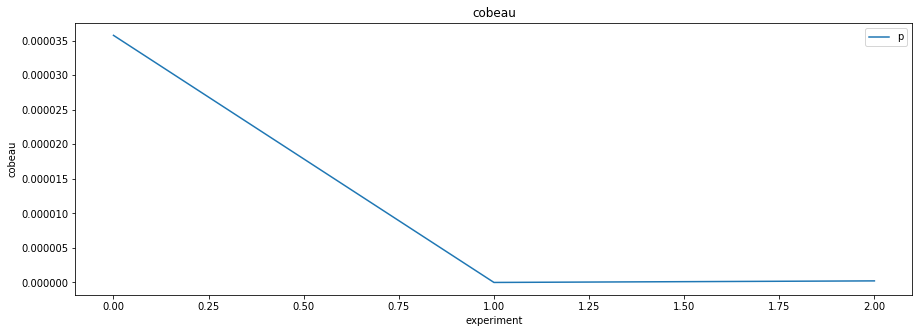

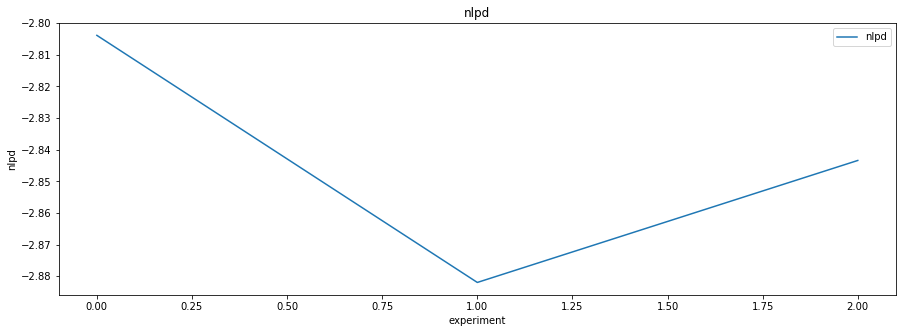

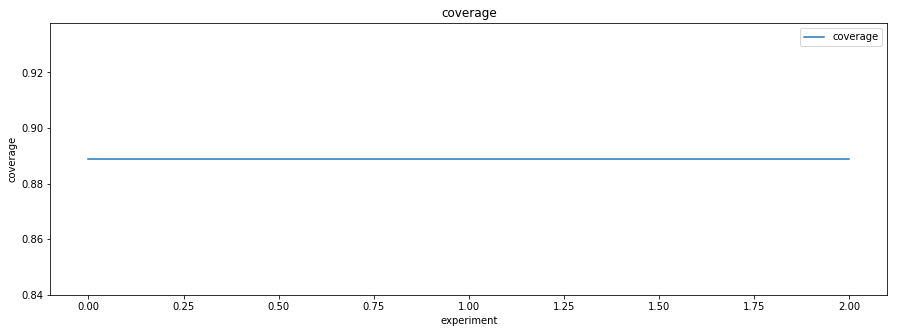

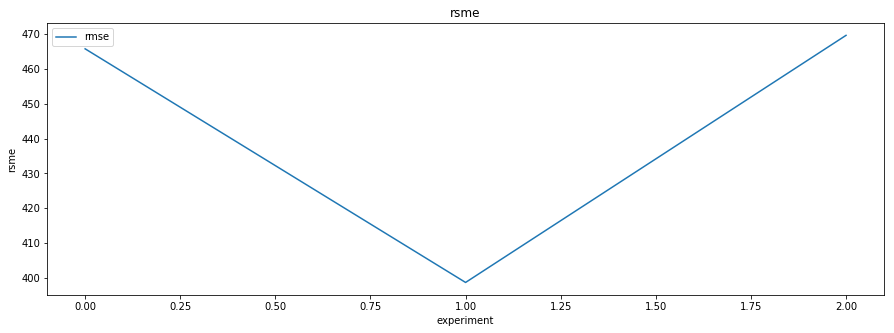

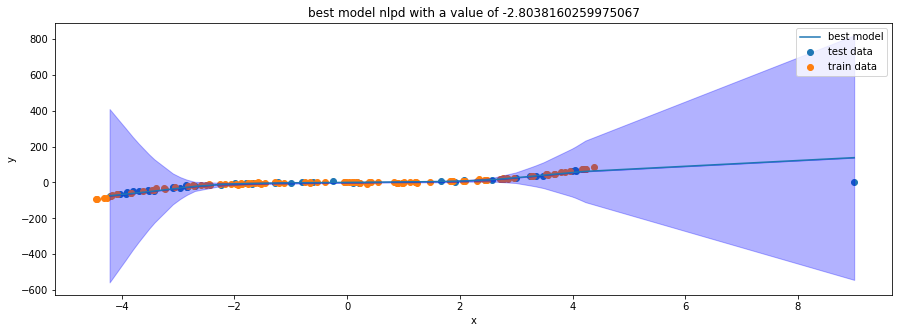

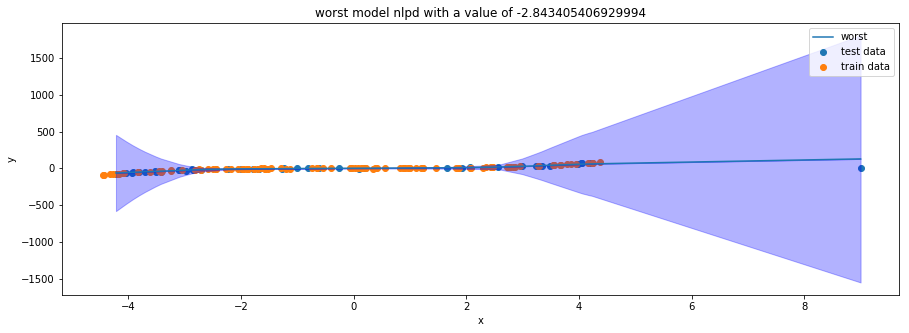

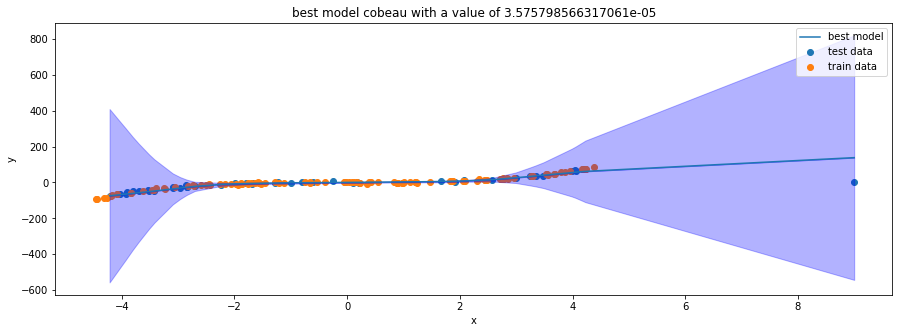

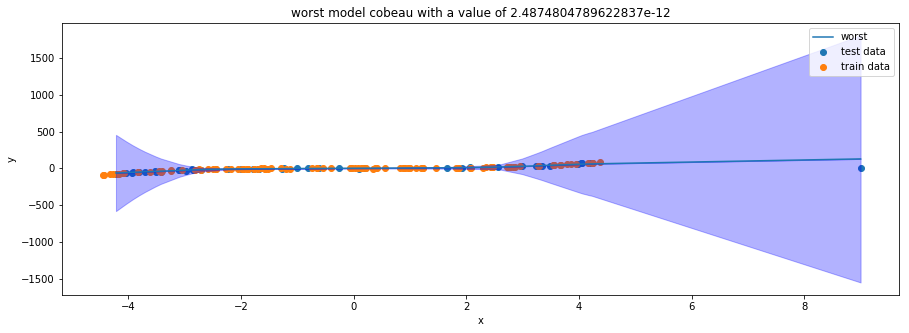

In [12]:
pd111 = repeat_experiment(BootstrapEnsemble, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 14:35:59.787579
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 74.45141005516052 seconds. That means the whole run will probably take 223.35423016548157 more seconds and 3.722570502758026 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 243.67450594902039 seconds with 3 experiments
             cobeau  coverage        nlpd        rsme
count  3.000000e+00  3.000000    3.000000    3.000000
mean   2.168615e-02  0.459259  -67.908580  746.234677
std    3.756152e-02  0.100206   93.655935  169.91

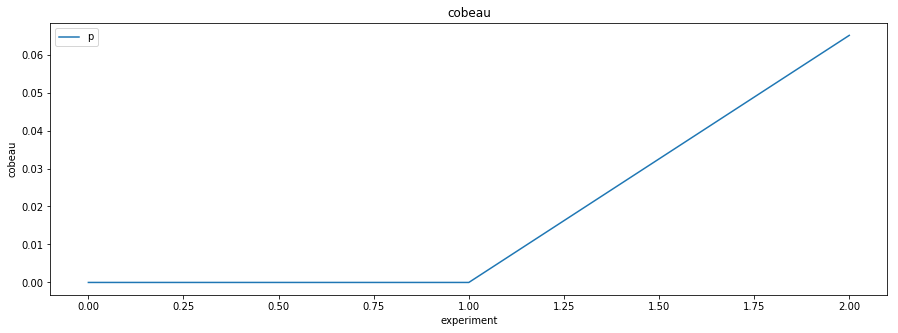

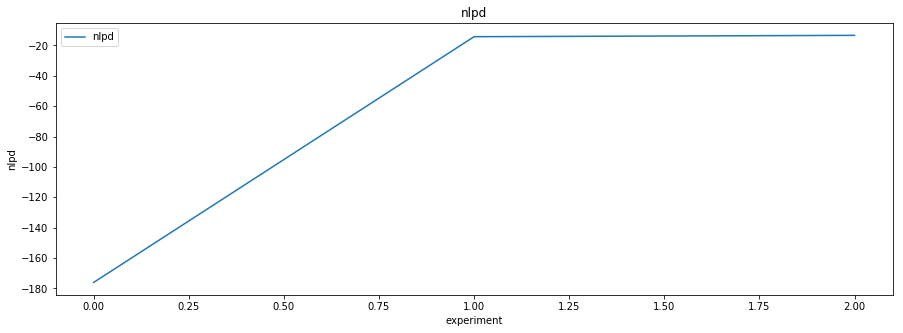

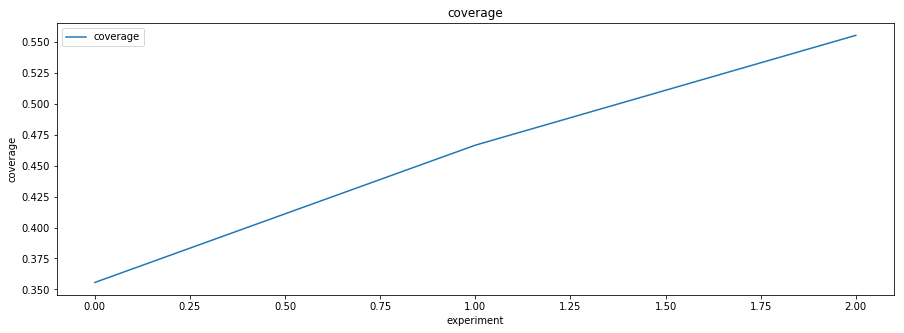

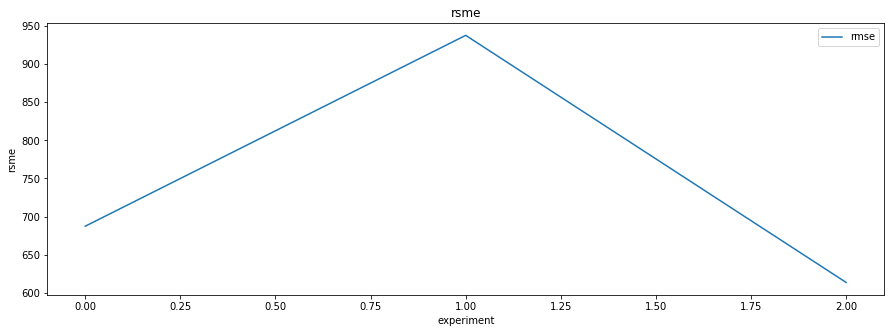

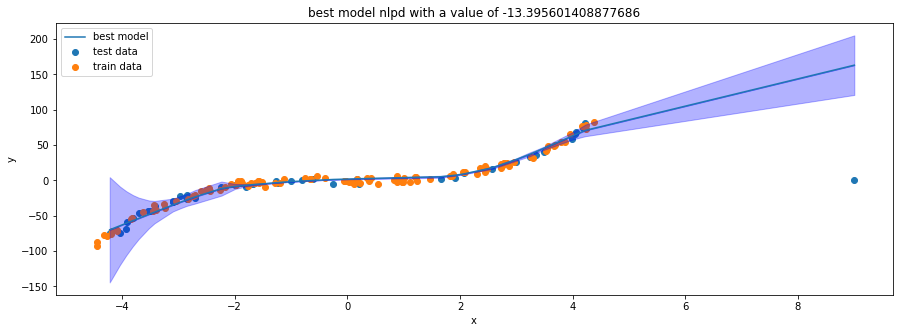

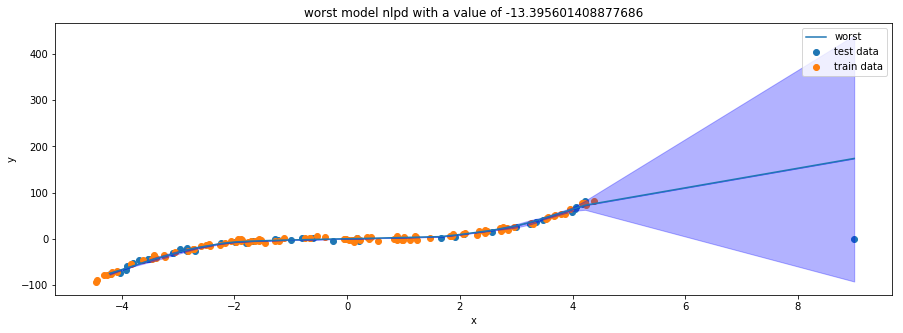

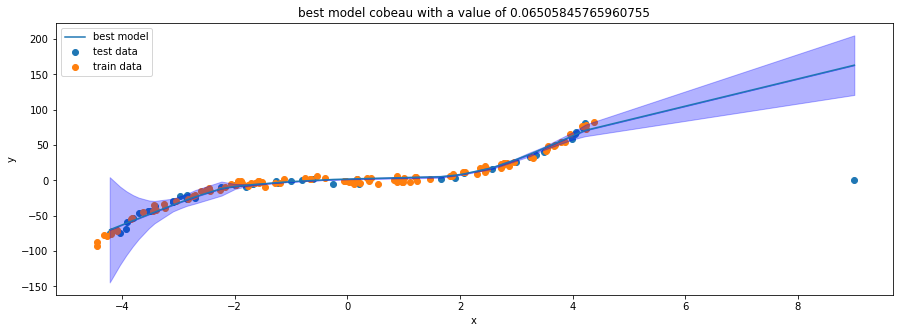

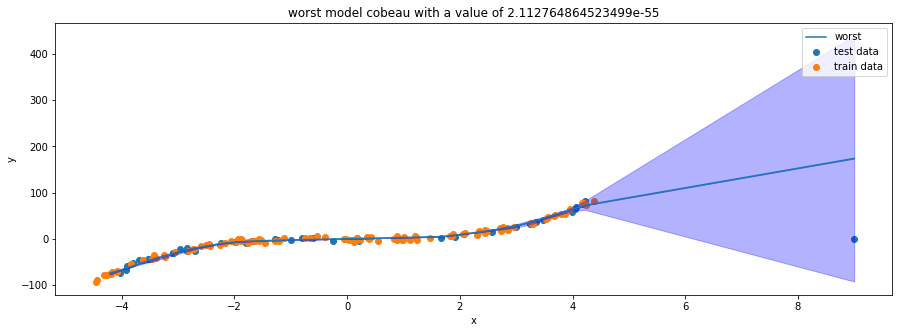

In [13]:
pd222 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 14:40:08.040651
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
experiment number 1 took 83.55852890014648 seconds. That means the whole run will probably take 250.67558670043945 more seconds and 4.177926445007325 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
overall, it took 228.05292534828186 seconds with 3 experiments
             cobeau  coverage       nlpd         rsme
count  3.000000e+00  3.000000   3.000000     3.000000
mean   2.177452e-12  0.570370 -24.856283   930.738128
std    3.771457e-12  0.046259  23.836635   287

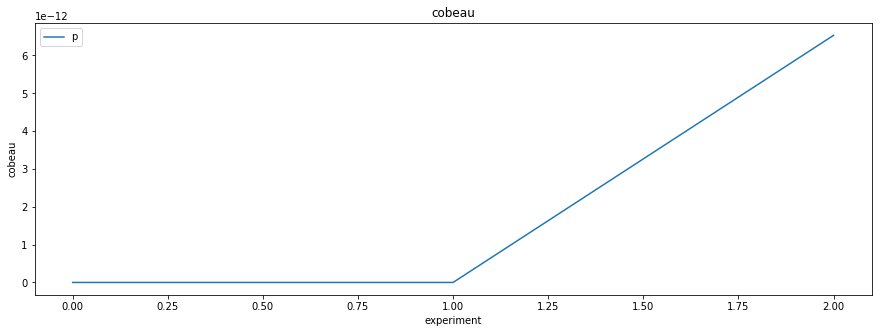

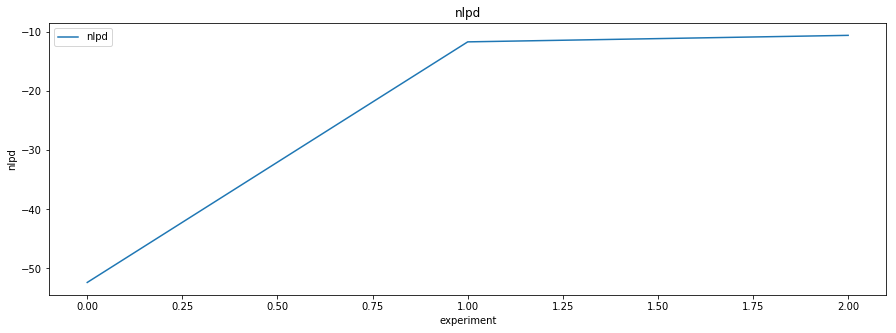

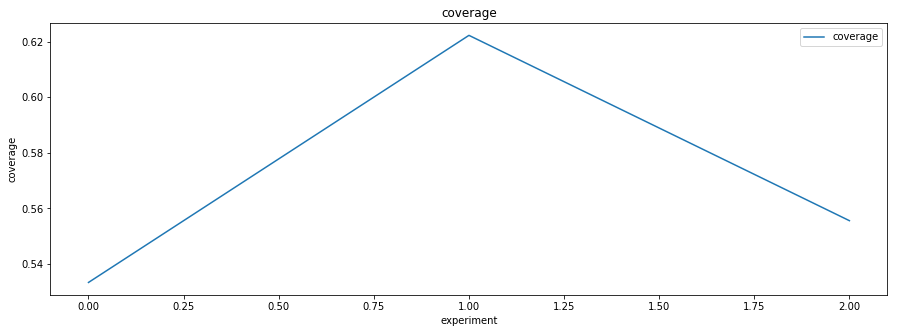

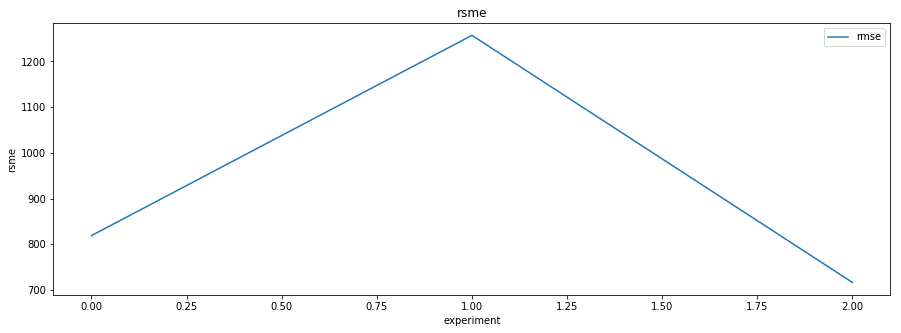

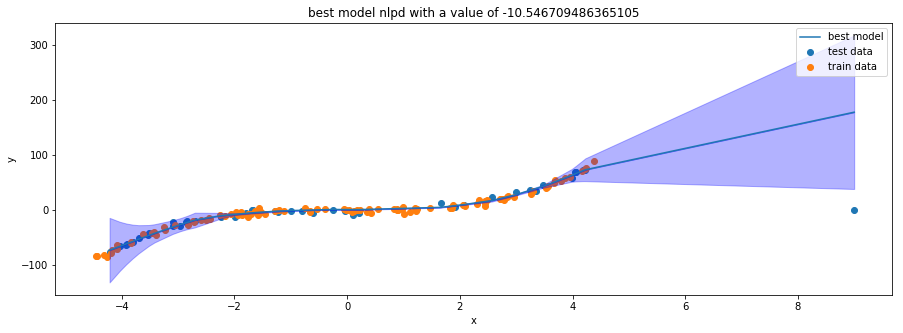

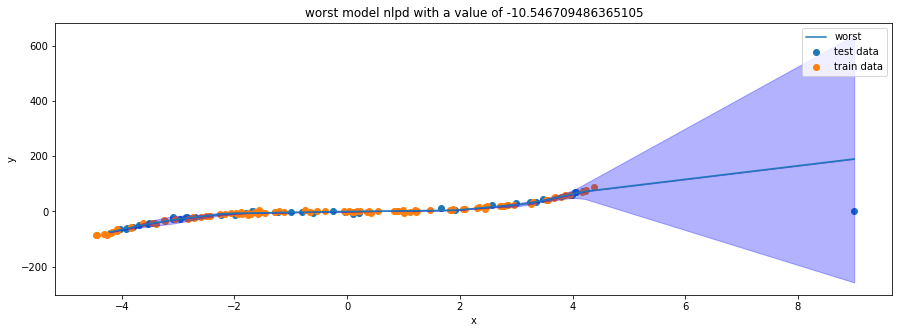

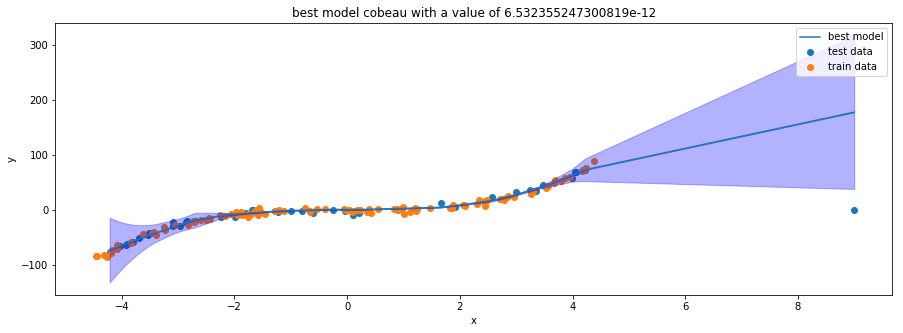

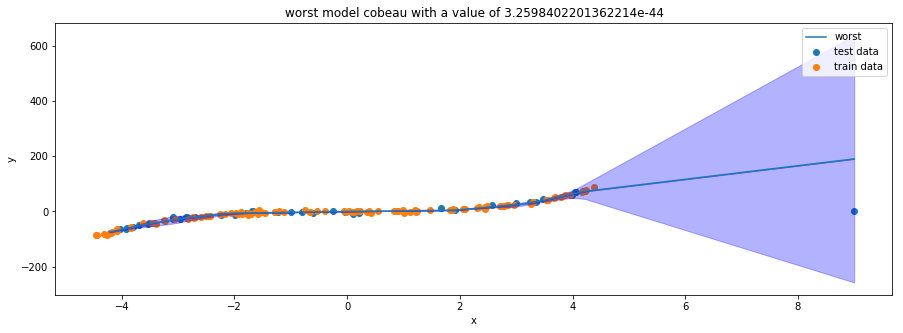

In [14]:
pd333 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 14:44:00.436019
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
experiment number 1 took 73.86158394813538 seconds. That means the whole run will probably take 221.58475184440613 more seconds and 3.6930791974067687 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
overall, it took 246.18074297904968 seconds with 3 experiments
         cobeau  coverage          nlpd         rsme
count  3.000000  3.000000      3.000000     3.000000
mean   0.253948  0.014815 -11683.889465   767.077267
std    0.223751  0.012830  12008.392057   229.881907
min    0.004265  0.

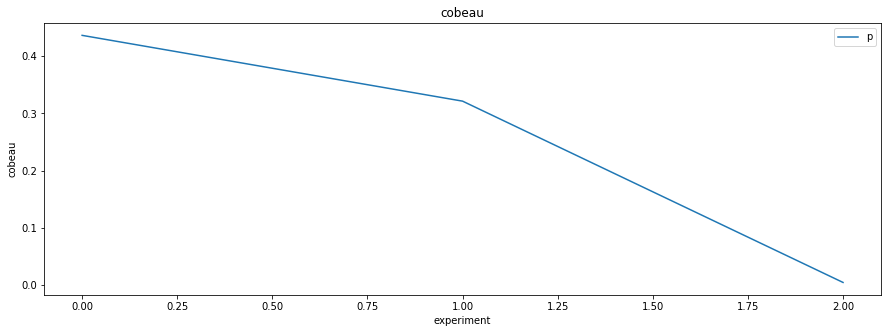

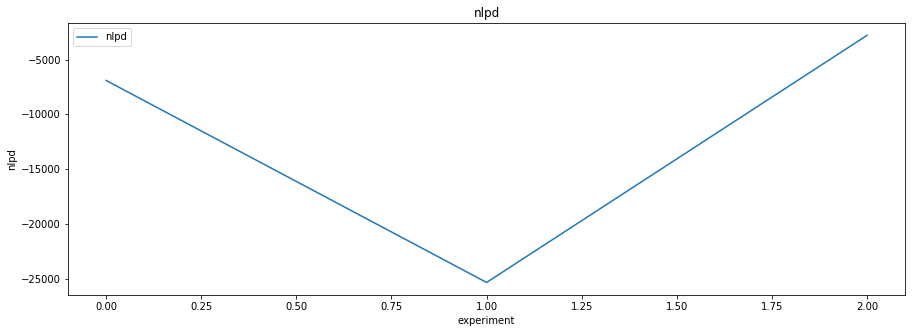

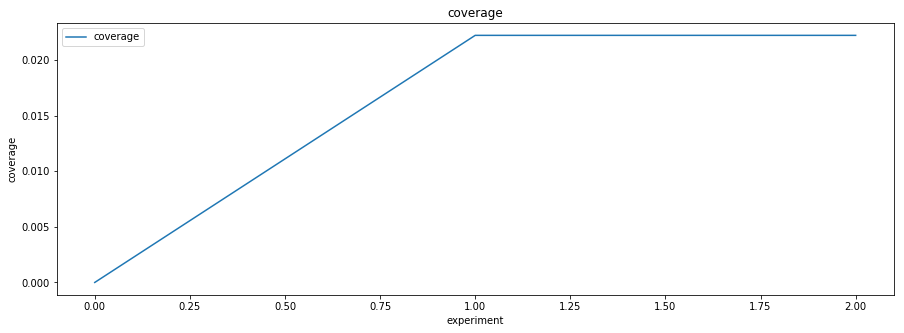

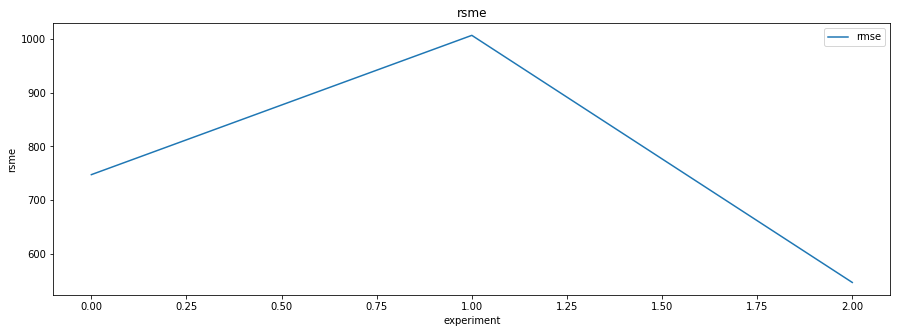

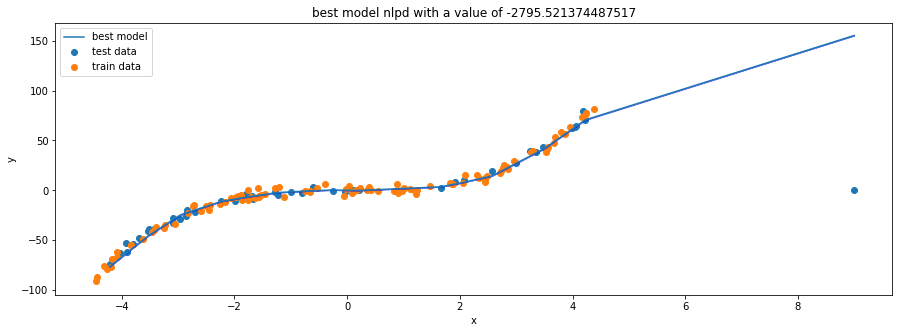

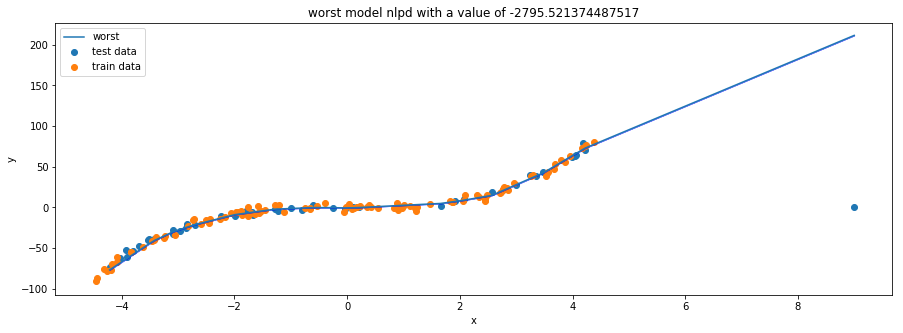

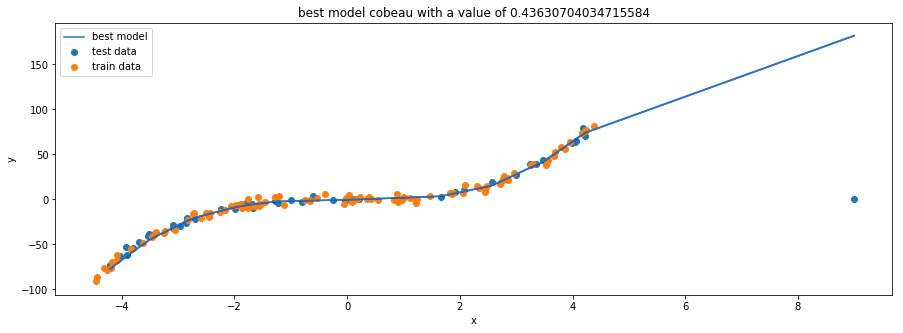

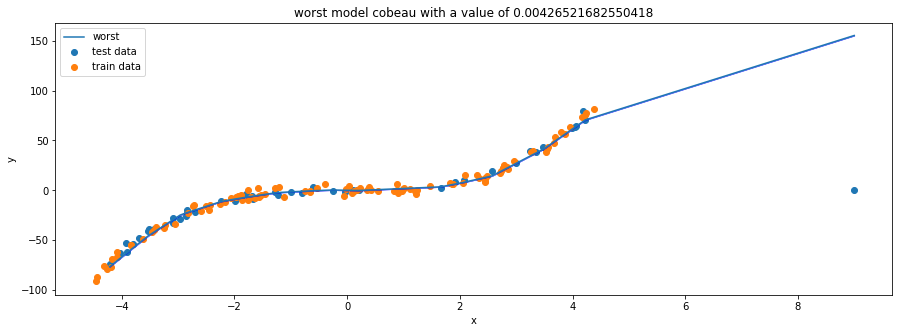

In [15]:
pd444 = repeat_experiment(BootstrapThroughTimeBobStrap, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)